# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [93]:
# Write your code here
import pandas as pd
from nltk import ngrams, FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
reviews=pd.read_csv('/content/imdb_movie_reviews_cleaned.csv')
cleaned_reviews=reviews['stemming and lemma'] #my cleaned review are in the column of stemming and lemma

In [95]:
import re
from collections import Counter

def tokenize_text(text):
    # Tokenize text into words
    words = re.findall(r'\w+', str(text).lower())
    return words

def get_ngrams(text, n):
    # Generate n-grams from text
    words = tokenize_text(text)
    ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
    return ngrams

def count_ngrams(texts, n):
    # Count the frequency of n-grams in a list of texts
    ngram_counts = Counter()
    for text in texts:
        ngrams = get_ngrams(text, n)
        ngram_counts.update(ngrams)
    return ngram_counts

# Sample data similar to the provided dataset
texts = cleaned_reviews

#N=3 for trigram
trigram_count = count_ngrams(texts, 3)
print("Trigram Counts:",trigram_count)



Trigram Counts: Counter({('robert', 'downey', 'jr'): 328, ('j', 'robert', 'oppenheimer'): 246, ('blunt', 'florence', 'pugh'): 164, ('downey', 'jr', 'emily'): 123, ('jr', 'emily', 'blunt'): 123, ('emily', 'blunt', 'florence'): 123, ('general', 'leslie', 'grove'): 123, ('weapon', 'mass', 'destruction'): 123, ('cinematic', 'experience', 'like'): 123, ('ultimately', 'unsatisfye', 'film'): 123, ('write', 'direct', 'christopher'): 82, ('direct', 'christopher', 'nolan'): 82, ('matt', 'damon', 'robert'): 82, ('damon', 'robert', 'downey'): 82, ('major', 'general', 'leslie'): 82, ('bomb', 'remind', 'audience'): 82, ('good', 'old', 'fashioned'): 82, ('role', 'j', 'robert'): 82, ('los', 'alamos', 'laboratory'): 82, ('film', 'hour', 'long'): 82, ('mention', 'specific', 'scene'): 82, ('specific', 'scene', 'cause'): 82, ('scene', 'cause', 'single'): 82, ('cause', 'single', 'person'): 82, ('single', 'person', 'theatre'): 82, ('person', 'theatre', 'nervously'): 82, ('theatre', 'nervously', 'seat'): 82,

In [96]:
#I tried my best without using the library,but had to rely partially on libraries

In [97]:
from nltk import bigrams, FreqDist
from nltk.tokenize import word_tokenize
from collections import Counter

In [98]:
# Function to generate bigrams
def generate_bigrams(text):
    tokens = word_tokenize(text)
    return list(bigrams(tokens))

# Function to count the frequency of bigrams
def count_bigram_frequency(texts):
    bigram_list = [generate_bigrams(text) for text in texts]
    bigrams_flat = [bigram for sublist in bigram_list for bigram in sublist]
    return Counter(bigrams_flat)

# Function to calculate bigram probabilities
def calculate_bigram_probabilities(texts):
    bigram_frequency = count_bigram_frequency(texts)
    unigram_frequency = Counter(word_tokenize(' '.join(texts)))

    bigram_probabilities = {}
    for bigram, count in bigram_frequency.items():
        w2, w1 = bigram
        probability = count / unigram_frequency[w1]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

# Calculate bigram probabilities
bigram_probabilities = calculate_bigram_probabilities(cleaned_reviews)

# Display all bigrams and their probabilities
for bigram, probability in sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True):
    print(f"{bigram}: {probability:.4f}")

('oppenheimer', 'largely'): 1.0000
('dunkirk', 'click'): 1.0000
('need', 'rush'): 1.0000
('long', 'exhausting'): 1.0000
('exhausting', 'filmbut'): 1.0000
('not', 'deny'): 1.0000
('deny', 'exceptionally'): 1.0000
('feel', 'accurately'): 1.0000
('accurately', 'capture'): 1.0000
('period', 'set'): 1.0000
('set', 'contain'): 1.0000
('sound', 'design'): 1.0000
('film', 'belong'): 1.0000
('award', 'considerationthe'): 1.0000
('s', 'sequence'): 1.0000
('particularly', 'terrifying'): 1.0000
('manage', 'suspenseful'): 1.0000
('story', 'commonly'): 1.0000
('history', 'pointi'): 1.0000
('extend', 'epilogue'): 1.0000
('movie', 'currently'): 1.0000
('little', 'patience'): 1.0000
('test', 'subjective'): 1.0000
('like', 'similarly'): 1.0000
('long', 'babylon'): 1.0000
('babylon', 'totally'): 1.0000
('totally', 'justified'): 1.0000
('feel', 'wayim'): 1.0000
('leave', 'feeling'): 1.0000
('nt', 'slam'): 1.0000
('slam', 'dunk'): 1.0000
('worth', 'celebrate'): 1.0000
('ll', 'wit'): 1.0000
('wit', 'brain')

In [99]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [100]:
from nltk import pos_tag, word_tokenize, RegexpParser
# Define a grammar for noun phrases
grammar = r"""
    NP: {<DT|JJ|NN.*>+}  # Chunk sequences of DT, JJ, and NN
"""

# Function to extract noun phrases from a sentence
def extract_noun_phrases(text):
    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    parser = RegexpParser(grammar)
    tree = parser.parse(tagged_tokens)

# Extract noun phrases from the tree
    noun_phrases = [' '.join([word for word, tag in subtree.leaves()]) for subtree in tree.subtrees() if subtree.label() == 'NP']
    return noun_phrases

# Extract noun phrases for each review
reviews['noun_phrases'] = reviews['stemming and lemma'].apply(extract_noun_phrases)

# Calculate the frequency of each noun phrase in the whole dataset
all_noun_phrases = [phrase for phrases in reviews['noun_phrases'] for phrase in phrases]
noun_phrase_counts = Counter(all_noun_phrases)

# Calculate the relative probabilities for each review
for index, row in reviews.iterrows():
    review_noun_phrases = row['noun_phrases']
    max_frequency = max([noun_phrase_counts[phrase] for phrase in review_noun_phrases])

# Display the results
    print(f"Review {index + 1}:")
    for phrase in review_noun_phrases:
        frequency = noun_phrase_counts[phrase]
        relative_probability = frequency / max_frequency
        print(f"  Noun Phrase: {phrase}, Relative Probability: {relative_probability:.2f}")

Streaming output truncated to the last 5000 lines.
  Noun Phrase: moviei sum, Relative Probability: 0.12
  Noun Phrase: fine interesting biography movie ve, Relative Probability: 0.12
  Noun Phrase: cinema year congratulate christopher nolan, Relative Probability: 0.12
  Noun Phrase: great movie, Relative Probability: 0.12
Review 849:
  Noun Phrase: good construct, Relative Probability: 1.00
  Noun Phrase: timing event good tell, Relative Probability: 1.00
  Noun Phrase: half movie, Relative Probability: 1.00
  Noun Phrase: build introduce charcter important story heisenberg jean tatlock, Relative Probability: 1.00
  Noun Phrase: half hour, Relative Probability: 1.00
  Noun Phrase: thing upthe second thing let, Relative Probability: 1.00
  Noun Phrase: story main struggle, Relative Probability: 1.00
  Noun Phrase: atomic bomb moral desaster kill people film, Relative Probability: 1.00
  Noun Phrase: stick argument bomb japanese, Relative Probability: 1.00
  Noun Phrase: minor dream sce

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [101]:
reviews=pd.read_csv('/content/imdb_movie_reviews_cleaned.csv')
cleaned_reviews=reviews['stemming and lemma'] #my cleaned review are in the column of stemming and lemma


In [102]:
import math

sentences = reviews["stemming and lemma"].values.tolist()

words = set([j for i in sentences for j in i.split(" ")])

tf_idf_df = pd.DataFrame(words, columns=["words"])
count = 1  # Counter variable for review numbering

# Function to calculate TF-IDF value for a word in a sentence
def tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Iterating through each sentence and calculating TF-IDF values for each word
for sentence in sentences:
    tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
    count += 1

<ipython-input-102-0b4fa9cce73e>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-102-0b4fa9cce73e>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_df["Review" + str(count)] = tf_idf_df["words"].apply(lambda x: tf_idf(x, sentence))
<ipython-input-102-0b4fa9cce73e>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

In [103]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
search_sentence="All the actors did a fabulous work, this film will win oscar."
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

def cv(X_set, Y_set):
  r_vector = X_set.union(Y_set)
  list1 =[];list2 =[]
  for j in r_vector:
      if j in X_set: list1.append(1)
      else: list1.append(0)
      if j in Y_set: list2.append(1)
      else: list2.append(0)
  return r_vector, list1, list2

def cc(r_vector, l1, l2):
  count = 0
  for i in range(len(r_vector)):
        count+= list1[i]*list2[i]
  c = count / float((sum(list1)*sum(list2))**0.5)
  return c


list3 = []
for l in reviews['stemming and lemma']:
  Y_list = word_tokenize(l)
  Y_set = {k for k in Y_list if not k in stop_word}
  r_vector, list1, list2 = cv(X_set, Y_set)
  try:
    similarity = cc(r_vector, list1, list2)
  except ZeroDivisionError:
    similarity = 'None'
  list3.append(similarity)
Data2 = pd.DataFrame(list(zip(reviews['stemming and lemma'],list3)), columns=['Review','cosine cimilarity'])
Data2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,cosine cimilarity
0,anticipate film year people include oppenheime...,0.030557
1,ll wit brain fully switch watch oppenheimer ea...,0.066010
2,m big fan nolans work look forward understand ...,0.085358
3,oppenheimer biographical thriller film write d...,0.029934
4,movie wow not think feel like watch movie like...,0.039841
...,...,...
1020,not masterpiece decent biopic interesting pers...,0.000000
1021,m big nolan fan maybe not methis movie promote...,0.026603
1022,review oppenheimer \n rating plus \n cine...,0.062746
1023,nolan good construct complicated timing event ...,0.033845


In [104]:
Data2['cosine cimilarity'].sort_values( )

208    0.000000
583    0.000000
588    0.000000
133    0.000000
594    0.000000
         ...   
935    0.142857
60     0.142857
210    0.142857
435    0.142857
510    0.142857
Name: cosine cimilarity, Length: 1025, dtype: float64

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

In [105]:
# Importing necessary libraries
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

reviews=pd.read_csv('/content/imdb_movie_reviews_cleaned.csv')
cleaned_reviews=reviews['stemming and lemma'] #my cleaned review are in the column of stemming and lemma

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


List of words in vocabulary: ['oppenheimer', 'movie', 'film', 'good', 'nolan', 'not', 'time', 'like', 'scene', 'story', 's', 'bomb', 'watch', 'great', 'feel', 'character', 'long', 'act', 'murphy', 'actor', 'tell', 'nolans', 'hour', 'know', 'robert', 'performance', 'man', 'work', 'christopher', 'downey', 'way', 'cillian', 'end', 'well', 'need', 'year', 'blunt', 'role', 'atomic', 'sound', 'lead', 'jr', 'moment', 'history', 'big', 'world', 'war', 'imax', 'damon', 'emily', 'play', 'go', 'find', 'try', 'little', 'view', 'give', 'life', 'political', 'm', 'score', 'people', 'maybe', 'event', 'look', 'cast', 'cut', 'see', 'weapon', 'thing', 'think', 'cinema', 'show', 'second', 'especially', 'oscar', 'screen', 'important', 'j', 'understand', 'audience', 'talk', 'nuclear', 'person', 'sure', 'pugh', 'director', 'fan', 'project', 'build', 'experience', 'matt', 'rest', 'jump', 'remind', 'period', 'focus', 'brilliant', 'hearing', 'complex', 'biopic', 'new', 'bring', 'come', 'true', 'hollywood', 'run

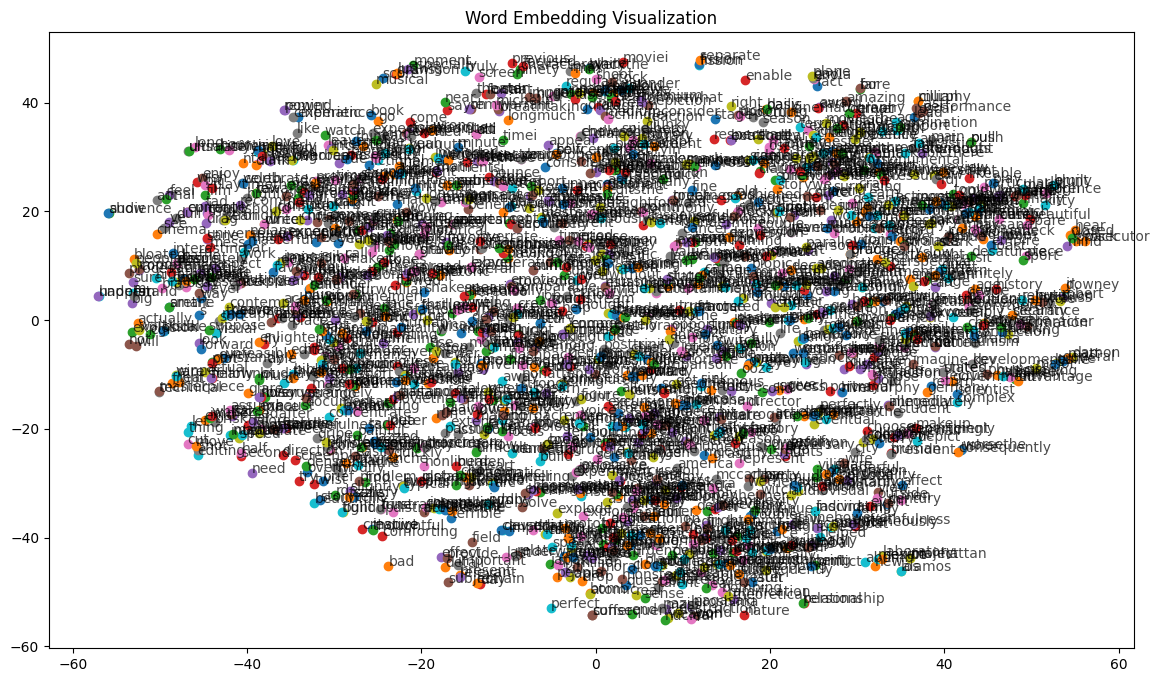

In [106]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
# Tokenizing the cleaned reviews into words
tokenized_reviews = [word_tokenize(i) for i in cleaned_reviews]

# Initializing and training a Word2Vec model
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Extracting words from the model's vocabulary
words = list(model.wv.index_to_key)

# Displaying the list of words
print("List of words in vocabulary:", words)

# Extracting word vectors
word_vectors = np.array([model.wv[i] for i in words])

# Applying t-SNE for dimensionality reduction to 2D
tsne_model = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne_model.fit_transform(word_vectors)

# Creating a DataFrame for visualization
df_visualization = pd.DataFrame({'word': words, 'x': word_vectors_2d[:, 0], 'y': word_vectors_2d[:, 1]})

# Plotting the word embeddings
plt.figure(figsize=(14, 8))
for i, j in df_visualization.iterrows():
    plt.scatter(j['x'], j['y'])
    plt.annotate(j['word'], (j['x'], j['y']), alpha=0.7)

plt.title('Word Embedding Visualization')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [109]:
# The GitHub link of your final csv file is attached below


https://raw.githubusercontent.com/SrikarDuriseti/5731-Assignments/main/sentiment_output.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [108]:
#This assignment is really challenging to work on the old reviews data that I used to clean in 2nd assignment. Also this N-grams and Tf-IDF vectorizer part will be primary part to learn in NLP.
#In that way , it really helped me to learn through this challenging work.
#Though it was tough I still enjoyed to produce the best results.
#Adequate amount of time was provided.